In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AlgerianForestFiresDatasetUPDATED.csv')

In [3]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
## Independent and dependent feature
X = df.loc[:,['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']] ## independent feature
y = df.loc[:,['FWI']] # dependent feature

In [5]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=34)

<AxesSubplot: >

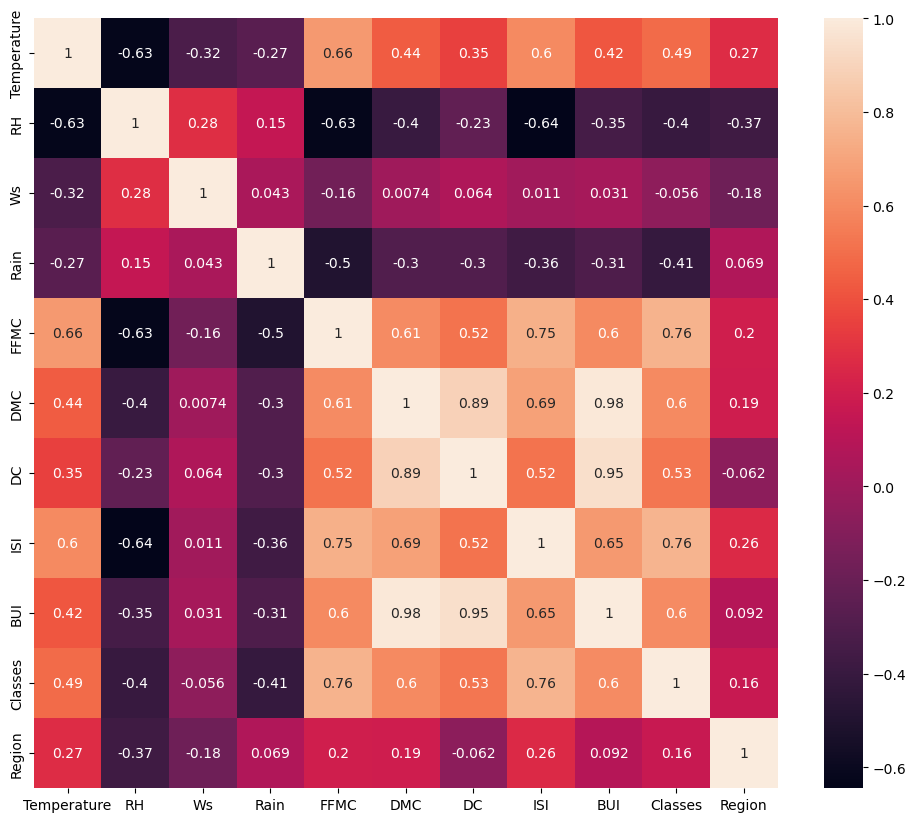

In [7]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

In [8]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [9]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [10]:
corr_features=correlation(X_train,0.85)

In [11]:
corr_features

{'BUI', 'DC'}

In [12]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features, axis=1,inplace=True)
X_train.shape, X_test.shape

((162, 9), (81, 9))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
X_train_scaled, X_test_scaled

(array([[ 1.39858177, -0.47975139, -1.50779125, ...,  0.19081084,
          0.9877296 ,  1.03774904],
        [ 1.10773421, -0.68980471,  0.19319888, ...,  1.48396492,
          0.9877296 , -0.96362411],
        [-0.05565601,  0.92060402,  1.55399099, ..., -0.77905472,
         -1.01242284, -0.96362411],
        ...,
        [ 0.23519154,  0.08039077, -0.8273952 , ...,  0.66330944,
          0.9877296 ,  1.03774904],
        [-0.05565601,  0.57051517, -1.16759323, ..., -0.95313315,
         -1.01242284,  1.03774904],
        [ 0.5260391 , -0.82984025,  0.19319888, ..., -0.60497628,
         -1.01242284,  1.03774904]]),
 array([[-2.09158891e+00,  1.83083504e+00, -8.27395201e-01,
          1.37587673e+00, -3.50820225e+00, -1.00344416e+00,
         -1.10234324e+00, -1.01242284e+00, -9.63624112e-01],
        [-1.21904624e+00,  1.06063957e+00,  1.93198879e-01,
         -3.58691600e-01, -5.20644368e-01, -3.82708508e-01,
         -7.54186369e-01, -1.01242284e+00, -9.63624112e-01],
        [ 8

/tmp/ipykernel_117/1942524928.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


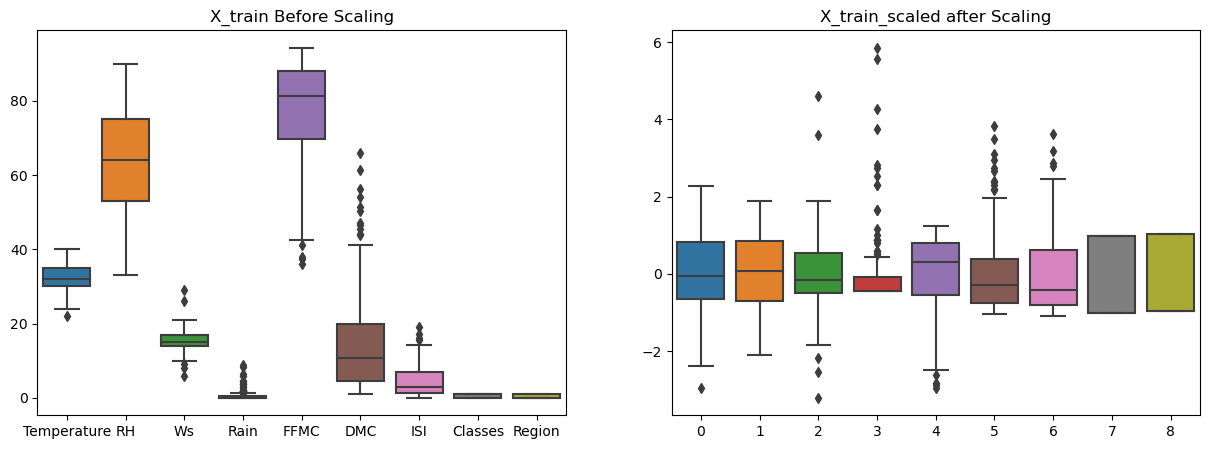

In [15]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_scaled after Scaling')
plt.show()

In [16]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2_score',score)

Mean absolute error 0.7537898548411532
R2_score 0.9789158168296099


In [17]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error', mae)
print('R2 Score', score)

Mean absolute error 1.2904530290038643
R2 Score 0.9408054714152129


## Ridge Regression model

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error', mae)
print('R2 Score', score)

Mean absolute error 0.773515496966514
R2 Score 0.9778521674757327


In [19]:
## Elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2_score', score)

Mean Absolute error 2.0023678445249513
R2_score 0.9778521674757327


In [20]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
